In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
Ion = pd.read_csv('Validazione_Ho166/Ion_vals.csv',sep=',')
SpectrumOK = pd.read_csv('Validazione_Ho166/Spectrum_vals.csv',sep=',')
SpectrumNO = pd.read_csv('Validazione_Ho166/SpectrumNO_vals.csv',sep=',')
SpectrumNico = pd.read_csv('Validazione_Ho166/SpectrumNico_vals.csv',sep=',')


#dataset = np.loadtxt("../Ho_spettri/Edo/EdoGiusti/Ho166_ed.txt")
#ed_Edo_Yield = dataset[:,1]#/100	
#ed_Edo_En = dataset[:,0]#/1000

#datasetGOK = np.loadtxt("../Ho_spettri/Edo/EdoGiusti/Ho166_g.txt")
#ed_Edo_Yield_G_OK = datasetGOK[:,1]#/100	
#ed_Edo_En_G_OK = datasetGOK[:,0]#/1000

#datasetG = np.loadtxt("../Ho_spettri/Edo/EdoVecchi/Ho166_g.txt")
#ed_Edo_Yield_G_NO = datasetG[:,1]#/100	
#ed_Edo_En_G_NO = datasetG[:,0]#/1000


ChEdo = 0.7248771763232001 #sum(ed_Edo_Yield) 
NChEdo_OK = 0.2552149999999999
NChEdo_NO = 1.064517
BminusEdo = 0.9998888

TOT=NChEdo_OK+ChEdo+BminusEdo
TOT_NO=NChEdo_NO+ChEdo+BminusEdo

ChNico=0.74629
NChNico=0.271691
BminusNico=0.999932

TOT_Nico= ChNico+NChNico+BminusNico

print("\t\tBetaLines\tGammaLines\tTotal")
print("Edo Giusto:\t", ChEdo, NChEdo_OK, TOT)
print("Edo Sbagliato:\t", ChEdo, NChEdo_NO, TOT_NO)
print("Nico:\t\t", ChNico,"\t", NChNico,"\t", TOT_Nico)

		BetaLines	GammaLines	Total
Edo Giusto:	 0.7248771763232001 0.2552149999999999 1.9799809763232
Edo Sbagliato:	 0.7248771763232001 1.064517 2.7892829763232
Nico:		 0.74629 	 0.271691 	 2.017913


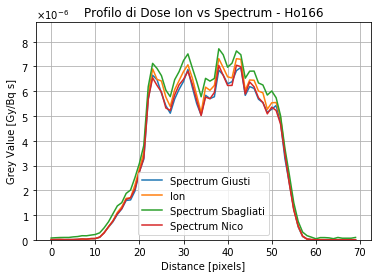

In [88]:
SpectrumOk = SpectrumOK['Gray_Value']*TOT
EdoNo = SpectrumNO['Gray_Value']*TOT_NO

plt.plot(SpectrumOK['Distance_(pixels)'] , SpectrumOk , label='Spectrum Giusti')#, marker='x')
plt.plot(Ion['Distance_(pixels)'] , Ion['Gray_Value'] , label='Ion')#, marker='x')
plt.plot(SpectrumNO['Distance_(pixels)'] , SpectrumNO['Gray_Value']*TOT_NO , label='Spectrum Sbagliati')#, marker='x')
plt.plot(SpectrumNico['Distance_(pixels)'] , SpectrumNico['Gray_Value']*TOT_Nico , label='Spectrum Nico')#, marker='x')

plt.title('Profilo di Dose Ion vs Spectrum - Ho166')
plt.xlabel('Distance [pixels]')
plt.ylabel('Grey Value [Gy/Bq s]')
plt.ylim(0,1.2*max(Ion['Gray_Value']))
plt.grid()
plt.legend()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
#plt.savefig("DoseProfiles_Ho166_All.png")
plt.show()

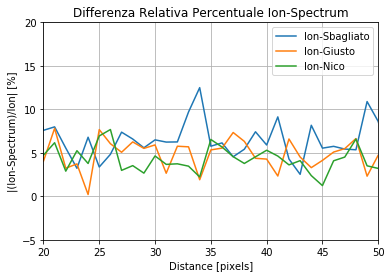

In [90]:
percNo = (Ion['Gray_Value']-(SpectrumNO['Gray_Value']*TOT_NO))*100/Ion['Gray_Value']
percSi = (Ion['Gray_Value']-(SpectrumOK['Gray_Value']*TOT))*100/Ion['Gray_Value']
percNico = (Ion['Gray_Value']-(SpectrumNico['Gray_Value']*TOT_Nico))*100/Ion['Gray_Value']

diffNo = (Ion['Gray_Value']-(SpectrumNO['Gray_Value']*TOT_NO))
diffSi = (Ion['Gray_Value']-(SpectrumOK['Gray_Value']*TOT))
diffNico = (Ion['Gray_Value']-(SpectrumNico['Gray_Value']*TOT_Nico))

plt.plot(Ion['Distance_(pixels)'], np.abs(percNo), label='Ion-Sbagliato')
plt.plot(Ion['Distance_(pixels)'], np.abs(percSi), label='Ion-Giusto')
plt.plot(Ion['Distance_(pixels)'], np.abs(percNico), label='Ion-Nico')

plt.title('Differenza Relativa Percentuale Ion-Spectrum')
plt.xlabel('Distance [pixels]')
plt.ylabel('|(Ion-Spectrum)/Ion| [%]')
plt.legend(loc='upper right')
plt.xlim(20,50)
plt.ylim(-5,20)
plt.grid()

#plt.savefig("DiffRel_Ho166.png")
plt.show()

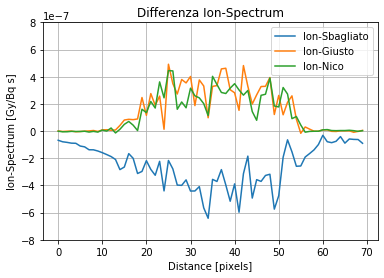

In [93]:
plt.plot(Ion['Distance_(pixels)'], diffNo, label='Ion-Sbagliato')
plt.plot(Ion['Distance_(pixels)'], diffSi, label='Ion-Giusto')
plt.plot(Ion['Distance_(pixels)'], diffNico, label='Ion-Nico')



plt.title('Differenza Ion-Spectrum')
plt.xlabel('Distance [pixels]')
plt.ylabel('Ion-Spectrum [Gy/Bq s]')
plt.legend(loc='upper right')
#plt.xlim(20,50)
plt.ylim(-0.8e-6,0.8e-6)
plt.grid()

#plt.savefig("Diff_Ho166.png")
plt.show()

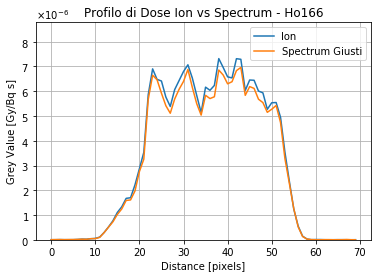

In [95]:
plt.plot(Ion['Distance_(pixels)'] , Ion['Gray_Value'] , label='Ion')#, marker='x')
plt.plot(SpectrumOK['Distance_(pixels)'] , SpectrumOk , label='Spectrum Giusti')#, marker='x')

plt.title('Profilo di Dose Ion vs Spectrum - Ho166')
plt.xlabel('Distance [pixels]')
plt.ylabel('Grey Value [Gy/Bq s]')
plt.ylim(0,1.2*max(Ion['Gray_Value']))
plt.grid()
plt.legend()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

plt.show()

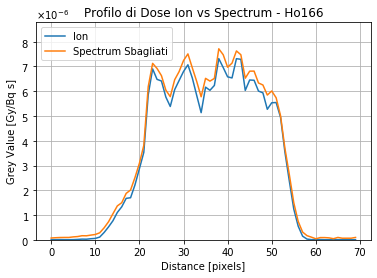

In [97]:
plt.plot(Ion['Distance_(pixels)'] , Ion['Gray_Value'] , label='Ion')#, marker='x')
plt.plot(SpectrumNO['Distance_(pixels)'] , SpectrumNO['Gray_Value']*TOT_NO , label='Spectrum Sbagliati')#, marker='x')

plt.title('Profilo di Dose Ion vs Spectrum - Ho166')
plt.xlabel('Distance [pixels]')
plt.ylabel('Grey Value [Gy/Bq s]')
plt.ylim(0,1.2*max(Ion['Gray_Value']))
plt.grid()
plt.legend()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

plt.show()

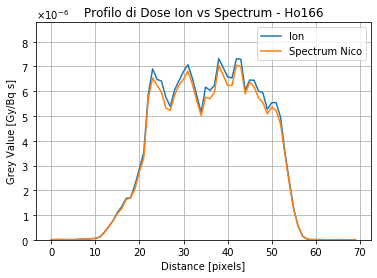

In [99]:
plt.plot(Ion['Distance_(pixels)'] , Ion['Gray_Value'] , label='Ion')#, marker='x')
plt.plot(SpectrumNico['Distance_(pixels)'] , SpectrumNico['Gray_Value']*TOT_Nico , label='Spectrum Nico')#, marker='x')

plt.title('Profilo di Dose Ion vs Spectrum - Ho166')
plt.xlabel('Distance [pixels]')
plt.ylabel('Grey Value [Gy/Bq s]')
plt.ylim(0,1.2*max(Ion['Gray_Value']))
plt.grid()
plt.legend()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

plt.show()

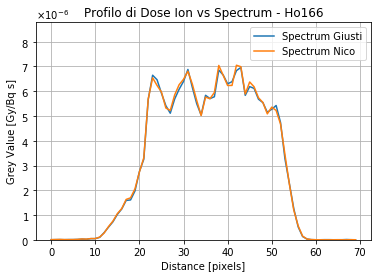

In [100]:
plt.plot(SpectrumOK['Distance_(pixels)'] , SpectrumOk , label='Spectrum Giusti')#, marker='x')
plt.plot(SpectrumNico['Distance_(pixels)'] , SpectrumNico['Gray_Value']*TOT_Nico , label='Spectrum Nico')#, marker='x')

plt.title('Profilo di Dose Ion vs Spectrum - Ho166')
plt.xlabel('Distance [pixels]')
plt.ylabel('Grey Value [Gy/Bq s]')
plt.ylim(0,1.2*max(Ion['Gray_Value']))
plt.grid()
plt.legend()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

plt.show()